@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/1g49iwKrV-U

<h1>
    <span style="color:blue">Clusterización:</span> 
    <span style="color:black">Métricas de Distancia</span>
</h1>
<h1 style="color:purple">Contexto y Datos</h1>

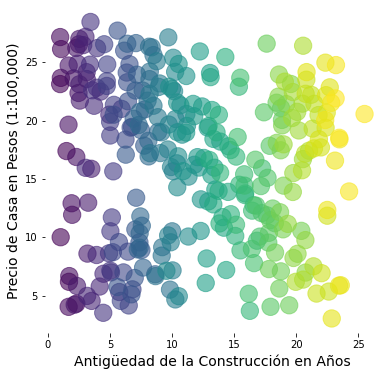

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
datos = np.loadtxt("venta_propiedades.csv", delimiter=",")

# Graficar datos
plt.figure(figsize=(6, 6))
plt.scatter(datos[:, 0], datos[:, 1], 
            c=np.linspace(0, 1, datos.shape[0]), s=300, alpha=0.6)
plt.xlabel("Antigüedad de la Construcción en Años", fontsize=14)
plt.ylabel("Precio de Casa en Pesos (1:100,000)", fontsize=14)
plt.box(False)
plt.show()

<h1 style="color:purple">Métricas de Distancia entre Vecinos</h1>
<h1>
    <span style="color:black">DBSCAN</span> 
    <span style="color:purple">- Scikit-learn</span>
</h1>



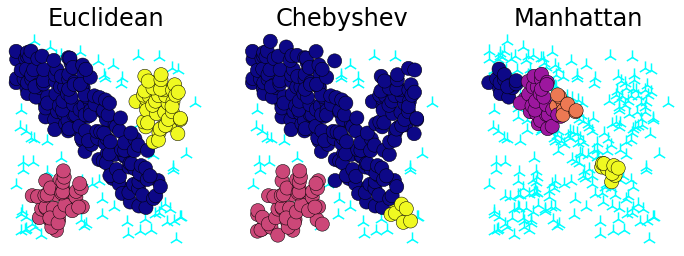

In [2]:
from sklearn.cluster import DBSCAN

# Cargar datos
datos = np.loadtxt("venta_propiedades.csv", delimiter=",")

# Identificar Clusters con diferentes distancias
distancias = ["euclidean", "chebyshev", "manhattan"]

fig = plt.figure(figsize=(12, 4))
plt.set_cmap("plasma")
for d in range(len(distancias)):
    clusters = DBSCAN(2, min_samples=10, 
                      metric=distancias[d]).fit_predict(datos)
    ax = fig.add_subplot(1, 3, d+1)
    # puntos considerados ruido
    ax.scatter(datos[clusters==-1][:, 0], datos[clusters==-1][:, 1], 
               c="cyan", s=200, marker="2")
    # puntos pertenencientes a clusters
    ax.scatter(datos[clusters>=0][:, 0], datos[clusters>=0][:, 1], 
               c=clusters[clusters>=0], s=200, 
               linewidth=0.5, edgecolors="black")
    ax.set_title(distancias[d].capitalize(), fontsize=24)
    ax.axis("off")
    
plt.show()